Data: https://www.kaggle.com/datasets/adilshamim8/student-performance-and-learning-style

# Setup

In [ ]:
import pandas as pd
import numpy as np
import os
from google.colab import drive

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB


In [ ]:
drive.mount('/content/drive', force_remount=True )
os.chdir( 'drive/My Drive' )
df = pd.read_csv('student_performance_large_dataset.csv')
print( df.shape )

Mounted at /content/drive
(10000, 15)


In [ ]:
df

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,S09996,20,Male,30,Auditory,6,Yes,62,58,76,Yes,Medium,17,6,C
9996,S09997,23,Female,16,Visual,8,Yes,54,84,86,Yes,Medium,6,5,B
9997,S09998,26,Male,23,Visual,3,Yes,54,40,70,No,Medium,20,8,D
9998,S09999,18,Male,41,Reading/Writing,7,Yes,66,45,90,Yes,Low,6,8,D


In [ ]:
df_tree = df.copy() # copy of raw data so I can use decision tree later

In [ ]:
df_tree

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,S09996,20,Male,30,Auditory,6,Yes,62,58,76,Yes,Medium,17,6,C
9996,S09997,23,Female,16,Visual,8,Yes,54,84,86,Yes,Medium,6,5,B
9997,S09998,26,Male,23,Visual,3,Yes,54,40,70,No,Medium,20,8,D
9998,S09999,18,Male,41,Reading/Writing,7,Yes,66,45,90,Yes,Low,6,8,D


# Displaying and Cleaning Data

In [ ]:
for x in df.columns:
  print( str( type( df[x].iloc[0] ) ) + ": " + x )

<class 'str'>: Student_ID
<class 'numpy.int64'>: Age
<class 'str'>: Gender
<class 'numpy.int64'>: Study_Hours_per_Week
<class 'str'>: Preferred_Learning_Style
<class 'numpy.int64'>: Online_Courses_Completed
<class 'str'>: Participation_in_Discussions
<class 'numpy.int64'>: Assignment_Completion_Rate (%)
<class 'numpy.int64'>: Exam_Score (%)
<class 'numpy.int64'>: Attendance_Rate (%)
<class 'str'>: Use_of_Educational_Tech
<class 'str'>: Self_Reported_Stress_Level
<class 'numpy.int64'>: Time_Spent_on_Social_Media (hours/week)
<class 'numpy.int64'>: Sleep_Hours_per_Night
<class 'str'>: Final_Grade


In [ ]:
df.count()

,0
Student_ID,10000
Age,10000
Gender,10000
Study_Hours_per_Week,10000
Preferred_Learning_Style,10000
Online_Courses_Completed,10000
Participation_in_Discussions,10000
Assignment_Completion_Rate (%),10000
Exam_Score (%),10000
Attendance_Rate (%),10000


In [ ]:
for x in df.columns:
  print( df[x].value_counts() )

Student_ID
S09984    1
S09983    1
S09982    1
S09981    1
S09980    1
         ..
S00005    1
S00004    1
S00003    1
S00002    1
S00001    1
Name: count, Length: 10000, dtype: int64
Age
21    875
25    858
27    852
20    849
19    846
18    838
28    830
29    825
26    822
22    813
23    810
24    782
Name: count, dtype: int64
Gender
Female    4846
Male      4748
Other      406
Name: count, dtype: int64
Study_Hours_per_Week
30    256
35    252
13    249
47    246
26    242
17    241
37    239
45    236
33    236
49    235
11    234
6     234
18    233
22    230
15    228
42    228
16    227
39    227
25    226
38    224
10    223
28    223
36    223
46    222
43    220
41    219
9     219
23    219
44    218
21    217
12    215
48    213
24    212
8     208
31    207
7     205
20    205
40    204
14    204
5     204
27    201
34    201
19    199
32    198
29    198
Name: count, dtype: int64
Preferred_Learning_Style
Visual             2523
Kinesthetic        2513
Reading/Writing   

In [ ]:
print("Shape:", df.shape)

print(df.dtypes)

print("\nMissing values:\n", df.isnull().sum())

dupes = df.duplicated().sum()
print(f"\nDuplicate rows: {dupes}")

Shape: (10000, 15)
Student_ID                                 object
Age                                         int64
Gender                                     object
Study_Hours_per_Week                        int64
Preferred_Learning_Style                   object
Online_Courses_Completed                    int64
Participation_in_Discussions               object
Assignment_Completion_Rate (%)              int64
Exam_Score (%)                              int64
Attendance_Rate (%)                         int64
Use_of_Educational_Tech                    object
Self_Reported_Stress_Level                 object
Time_Spent_on_Social_Media (hours/week)     int64
Sleep_Hours_per_Night                       int64
Final_Grade                                object
dtype: object

Missing values:
 Student_ID                                 0
Age                                        0
Gender                                     0
Study_Hours_per_Week                       0
Preferred_Learning_

In [ ]:
cat_cols = df.select_dtypes(include="object").columns
for c in cat_cols:
    print(c, df[c].value_counts())


Student_ID Student_ID
S09984    1
S09983    1
S09982    1
S09981    1
S09980    1
         ..
S00005    1
S00004    1
S00003    1
S00002    1
S00001    1
Name: count, Length: 10000, dtype: int64
Gender Gender
Female    4846
Male      4748
Other      406
Name: count, dtype: int64
Preferred_Learning_Style Preferred_Learning_Style
Visual             2523
Kinesthetic        2513
Reading/Writing    2498
Auditory           2466
Name: count, dtype: int64
Participation_in_Discussions Participation_in_Discussions
Yes    5996
No     4004
Name: count, dtype: int64
Use_of_Educational_Tech Use_of_Educational_Tech
Yes    7022
No     2978
Name: count, dtype: int64
Self_Reported_Stress_Level Self_Reported_Stress_Level
Medium    5015
Low       2966
High      2019
Name: count, dtype: int64
Final_Grade Final_Grade
A    2678
B    2455
C    2440
D    2427
Name: count, dtype: int64


In [ ]:
for x in df.columns:
  if df[x].dtype == 'object':
    df[x] = df[x].str.strip().str.capitalize()

# Scaling and Encoding

In [ ]:
gender_map = {"Female":0, "Male":1, "Other":2}
df["Gender_Code"] = df["Gender"].map(gender_map)

stress_map = {"Low":0, "Medium":1, "High":2}
df["Self_Reported_Stress_Level"] = df["Self_Reported_Stress_Level"].map(stress_map)

participattiojn_map = {"Yes":1, "No":0}
df["Participation_in_Discussions"] = df["Participation_in_Discussions"].map(participattiojn_map)

# Raw Data

df_tree["Gender_Code"] = df_tree["Gender"].map({"Female":0, "Male":1, "Other":2})

df_tree["Self_Reported_Stress_Level"] = df_tree["Self_Reported_Stress_Level"].map(stress_map)



In [ ]:
numeric_cols = []
for x in df.columns:
  if df[x].dtype == 'int64':
    numeric_cols.append(x)
print(numeric_cols)

['Age', 'Study_Hours_per_Week', 'Online_Courses_Completed', 'Participation_in_Discussions', 'Assignment_Completion_Rate (%)', 'Exam_Score (%)', 'Attendance_Rate (%)', 'Self_Reported_Stress_Level', 'Time_Spent_on_Social_Media (hours/week)', 'Sleep_Hours_per_Night', 'Gender_Code']


In [ ]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df[numeric_cols]))
outlier_mask = (z_scores > 3).any(axis=1)
print("Outlier rows:", outlier_mask.sum())

Outlier rows: 0


In [ ]:
from sklearn.preprocessing import StandardScaler

numeric_cols = df.select_dtypes(include='number').columns.tolist()
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
for col in numeric_cols:
    print(col, df[col])


Age 0      -1.582639
1       1.594887
2      -1.004907
3      -0.138309
4      -1.293773
          ...   
9995   -1.004907
9996   -0.138309
9997    0.728289
9998   -1.582639
9999    0.150557
Name: Age, Length: 10000, dtype: float64
Study_Hours_per_Week 0       1.605127
1       0.220714
2       1.528215
3      -1.086788
4      -0.240757
          ...   
9995    0.220714
9996   -0.856052
9997   -0.317669
9998    1.066744
9999   -1.471347
Name: Study_Hours_per_Week, Length: 10000, dtype: float64
Online_Courses_Completed 0       0.650559
1       1.628328
2       0.161674
3      -1.630902
4       1.465366
          ...   
9995   -0.653133
9996   -0.327210
9997   -1.142018
9998   -0.490172
9999    1.628328
Name: Online_Courses_Completed, Length: 10000, dtype: float64
Participation_in_Discussions 0       0.817177
1      -1.223725
2      -1.223725
3       0.817177
4       0.817177
          ...   
9995    0.817177
9996    0.817177
9997    0.817177
9998    0.817177
9999    0.817177
Name: Partic

In [ ]:
grade_map = {"A":4, "B":3, "C":2, "D":1, "F":0}
df["Final_Grade_Encoded"] = df["Final_Grade"].map(grade_map)
df_tree["Final_Grade_Encoded"] = df_tree["Final_Grade"].map(grade_map)

# Displayin Heatmap

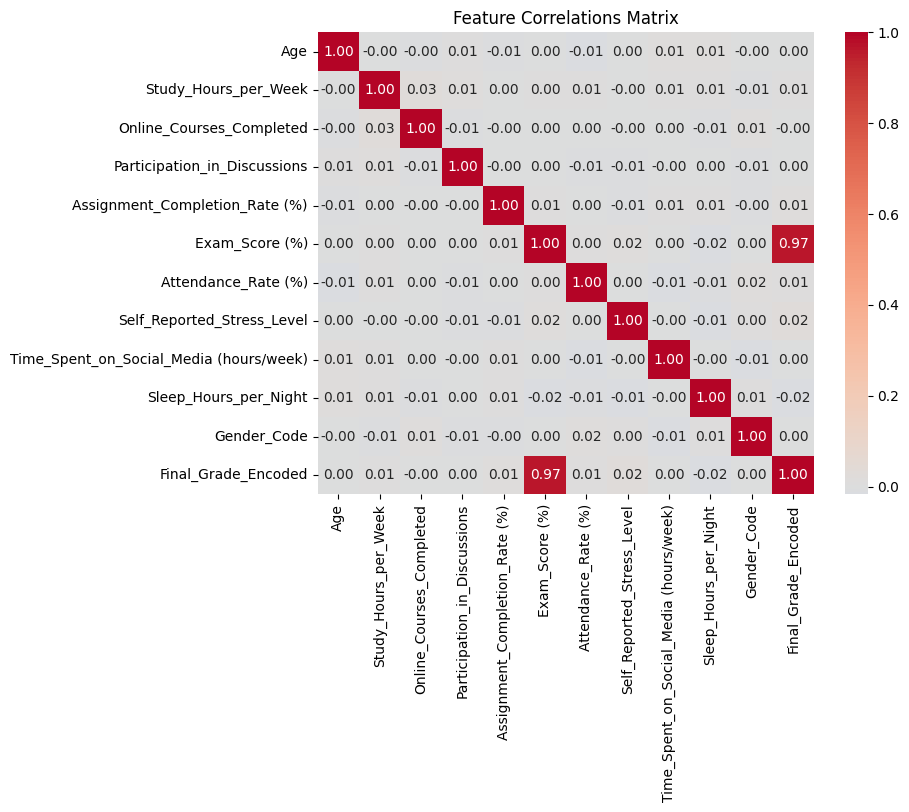

Attendance_Rate (%)                        1.000000
Gender_Code                                0.015198
Study_Hours_per_Week                       0.007768
Final_Grade_Encoded                        0.006275
Exam_Score (%)                             0.003717
Online_Courses_Completed                   0.001067
Self_Reported_Stress_Level                 0.000917
Assignment_Completion_Rate (%)             0.000026
Sleep_Hours_per_Night                     -0.005105
Participation_in_Discussions              -0.012126
Time_Spent_on_Social_Media (hours/week)   -0.013386
Age                                       -0.014050
Name: Attendance_Rate (%), dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_df = df.select_dtypes(include=["number"])



corr = num_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=True, fmt=".2f")
plt.title("Feature Correlations Matrix")
plt.show()

# Find top predictors of Final_Grade:
corr_target = corr["Attendance_Rate (%)"].sort_values(ascending=False)
print(corr_target)


# Decision Tree (Raw Data)

In [ ]:
# I wanted to be able read the data so I ran the the tree on non z-score values

In [ ]:
# Selecting some key features
features = ["Attendance_Rate (%)", "Study_Hours_per_Week", "Online_Courses_Completed", "Assignment_Completion_Rate (%)","Self_Reported_Stress_Level", "Sleep_Hours_per_Night", "Time_Spent_on_Social_Media (hours/week)"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

target = "Final_Grade_Encoded"

X_t = df_tree[features]
y_t = df_tree[target]

X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.2, random_state=42)

In [ ]:
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

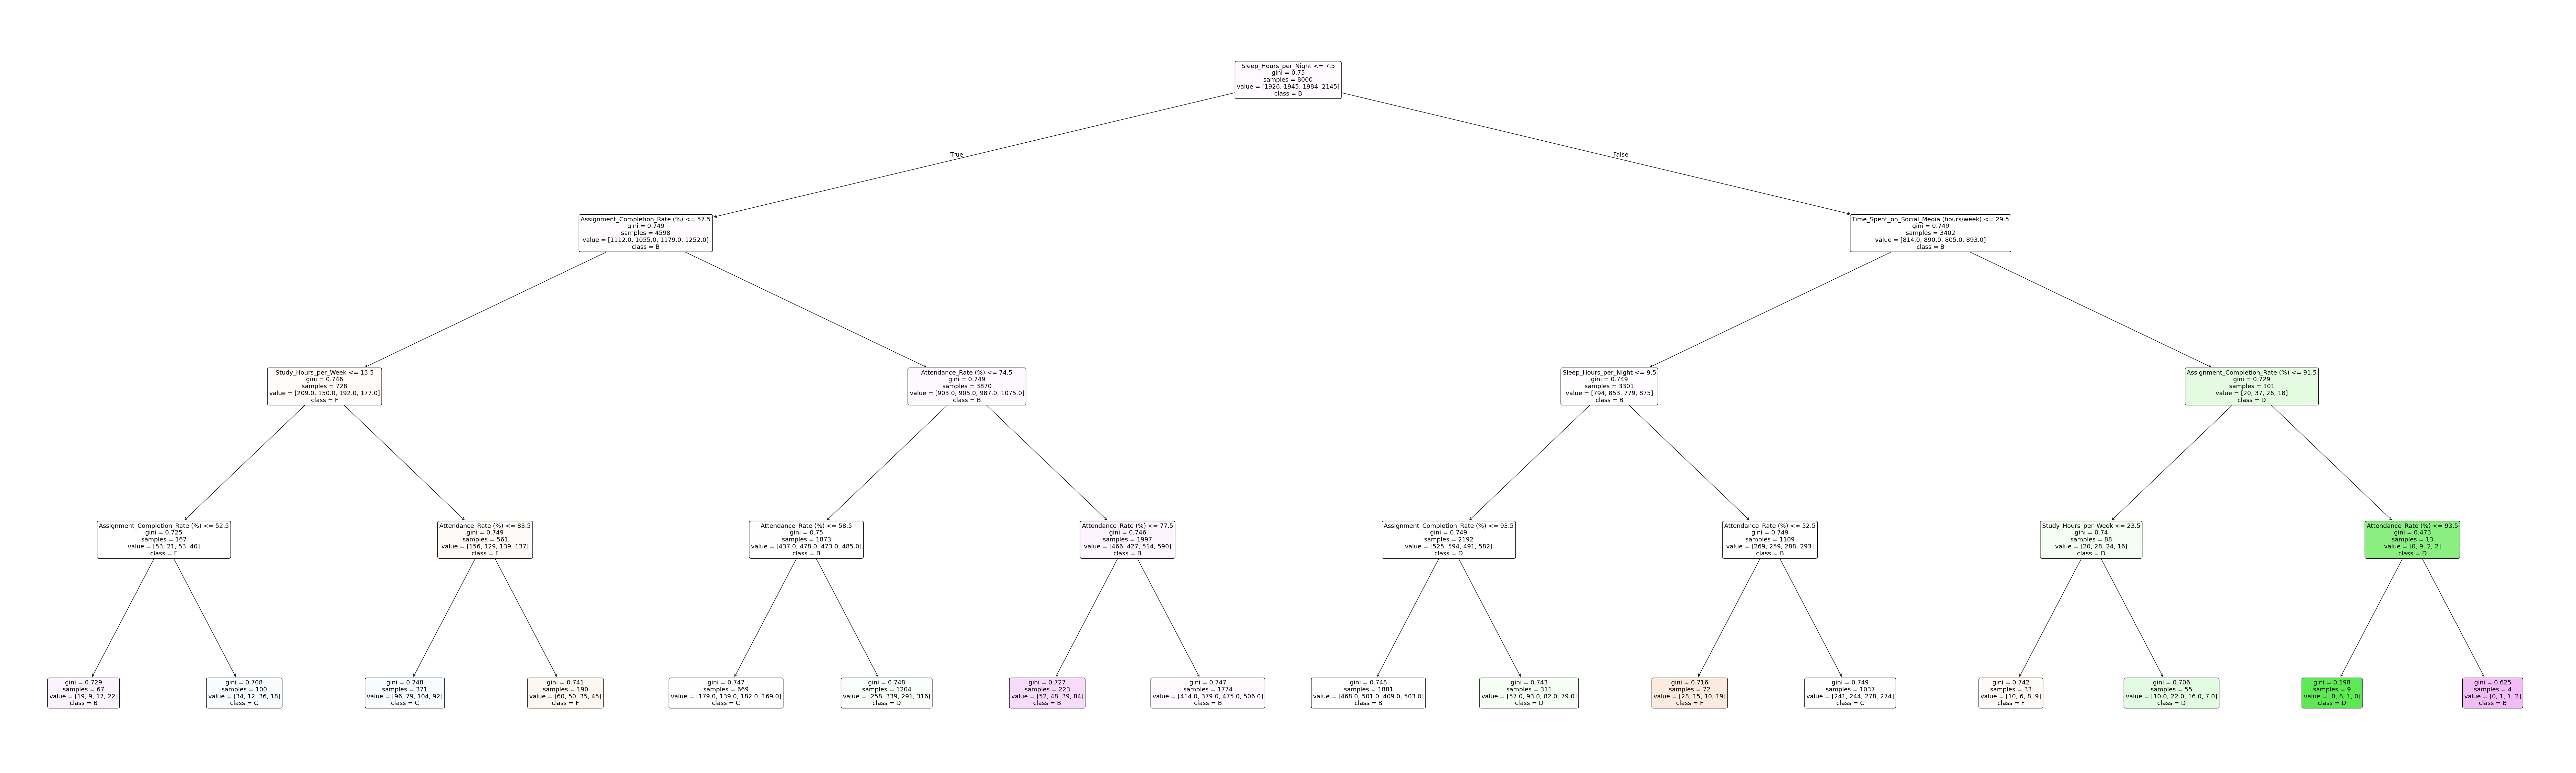

In [ ]:
plt.figure(figsize=(100, 30))
plot_tree(
    tree_model,
    feature_names=features,
    class_names=["F", "D", "C", "B", "A"],
    filled=True,
    rounded=True
)
plt.show()

In [ ]:
y_pred_tree = tree_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

[[ 18  90 134 259]
 [ 20  84 128 263]
 [ 16  88 120 247]
 [ 13 114 140 266]]
              precision    recall  f1-score   support

           1       0.27      0.04      0.06       501
           2       0.22      0.17      0.19       495
           3       0.23      0.25      0.24       471
           4       0.26      0.50      0.34       533

    accuracy                           0.24      2000
   macro avg       0.24      0.24      0.21      2000
weighted avg       0.25      0.24      0.21      2000



In [ ]:
importance = pd.Series(tree_model.feature_importances_, index=features)
importance.sort_values(ascending=False)

,0
Attendance_Rate (%),0.459073
Assignment_Completion_Rate (%),0.240960
Sleep_Hours_per_Night,0.134709
Study_Hours_per_Week,0.108233
Time_Spent_on_Social_Media (hours/week),0.057023
Online_Courses_Completed,0.000000
Self_Reported_Stress_Level,0.000000


# PCA

In [ ]:
df

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade,Gender_Code,Final_Grade_Encoded
0,S00001,-1.582639,Female,1.605127,Kinesthetic,0.650559,0.817177,1.708927,-0.067365,-0.616001,Yes,1.564605,-0.657989,0.511151,C,-0.970723,2
1,S00002,1.594887,Female,0.220714,Reading/writing,1.628328,-1.223725,-0.267263,-1.710558,-1.226232,Yes,0.135350,1.447930,0.511151,D,-0.970723,1
2,S00003,-1.004907,Female,1.528215,Kinesthetic,0.161674,-1.223725,-1.016852,-1.540573,0.265444,Yes,-1.293904,-0.214638,0.010366,D,-0.970723,1
3,S00004,-0.138309,Female,-1.086788,Auditory,-1.630902,0.817177,-0.812418,-0.010703,-1.022822,Yes,-1.293904,1.004579,1.512721,B,-0.970723,3
4,S00005,-1.293773,Female,-0.240757,Auditory,1.465366,0.817177,-1.084996,-0.407336,1.214692,Yes,0.135350,1.226255,0.511151,C,-0.970723,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,S09996,-1.004907,Male,0.220714,Auditory,-0.653133,0.817177,-0.880563,-0.690645,0.062033,Yes,0.135350,0.228714,-0.490419,C,0.775182,2
9996,S09997,-0.138309,Female,-0.856052,Visual,-0.327210,0.817177,-1.425719,0.782562,0.740068,Yes,0.135350,-0.990503,-0.991204,B,-0.970723,3
9997,S09998,0.728289,Male,-0.317669,Visual,-1.142018,0.817177,-1.425719,-1.710558,-0.344787,No,0.135350,0.561228,0.511151,D,0.775182,1
9998,S09999,-1.582639,Male,1.066744,Reading/writing,-0.490172,0.817177,-0.607985,-1.427249,1.011282,Yes,-1.293904,-0.990503,0.511151,D,0.775182,1


In [ ]:
df["Grade_Binary"] = df["Final_Grade_Encoded"].apply(lambda x: 1 if x >= 2 else 0)
df["Grade_Binary"].value_counts(normalize=True)

,proportion
Grade_Binary,
1,0.7573
0,0.2427


In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

X = df[features]
y = df["Grade_Binary"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

best_k = None
best_score = 0
best_knn = None

K = []
training = []
test = []
scores = {}

for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_scaled, y_train)

    training_score = clf.score(X_train_scaled, y_train)
    test_score = clf.score(X_test_scaled, y_test)

    K.append(k)
    training.append(training_score)
    test.append(test_score)

    if test_score > best_score:
        best_k = k
        best_score = test_score
        best_knn = clf
        print(f"New best k: {best_k}, Test Accuracy: {best_score:.3f}")

    scores[k] = [training_score, test_score]

New best k: 2, Test Accuracy: 0.530
New best k: 3, Test Accuracy: 0.678
New best k: 5, Test Accuracy: 0.701
New best k: 7, Test Accuracy: 0.719
New best k: 9, Test Accuracy: 0.730
New best k: 11, Test Accuracy: 0.737
New best k: 13, Test Accuracy: 0.739
New best k: 15, Test Accuracy: 0.741
New best k: 17, Test Accuracy: 0.745
New best k: 19, Test Accuracy: 0.747


In [ ]:
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.818, 0.5305]
3 : [0.81625, 0.678]
4 : [0.78475, 0.6275]
5 : [0.77975, 0.7005]
6 : [0.765125, 0.671]
7 : [0.764625, 0.7185]
8 : [0.763375, 0.6985]
9 : [0.764125, 0.73]
10 : [0.763375, 0.717]
11 : [0.759625, 0.737]
12 : [0.758, 0.7275]
13 : [0.760625, 0.739]
14 : [0.759, 0.734]
15 : [0.759125, 0.741]
16 : [0.758, 0.7365]
17 : [0.758, 0.745]
18 : [0.757875, 0.743]
19 : [0.75775, 0.747]
20 : [0.757125, 0.7455]


In [ ]:
y_pred_knn = best_knn.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, target_names=["Fail", "Pass"]))

[[   2  499]
 [   7 1492]]
              precision    recall  f1-score   support

        Fail       0.22      0.00      0.01       501
        Pass       0.75      1.00      0.86      1499

    accuracy                           0.75      2000
   macro avg       0.49      0.50      0.43      2000
weighted avg       0.62      0.75      0.64      2000



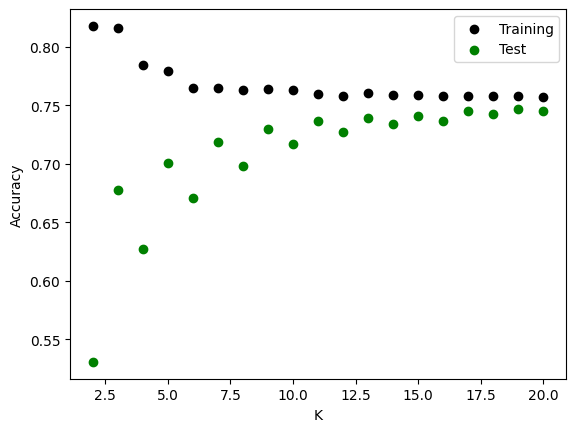

In [ ]:
plt.scatter(K, training, color ='k', label="Training")
plt.scatter(K, test, color ='g', label="Test")
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Next I'm going to create some features and implement Logistic Regression to try to further imporve the accuracy.


# Feature Creation + More KNN

In [ ]:
df["Study_Efficiency"] = df["Assignment_Completion_Rate (%)"] / df["Study_Hours_per_Week"]
df["procrastination"] = df["Time_Spent_on_Social_Media (hours/week)"] / df["Study_Hours_per_Week"]
df["Student_Effort"] = df["Attendance_Rate (%)"] + df["Participation_in_Discussions"] + df["Assignment_Completion_Rate (%)"] - df["procrastination"]

new_features = features + ["Study_Efficiency", "procrastination", "Student_Effort"]

X = df[new_features]
y = df["Grade_Binary"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

best_k = None
best_score = 0
best_knn = None

K = []
training = []
test = []
scores = {}

for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_scaled, y_train)

    training_score = clf.score(X_train_scaled, y_train)
    test_score = clf.score(X_test_scaled, y_test)

    K.append(k)
    training.append(training_score)
    test.append(test_score)

    if test_score > best_score:
        best_k = k
        best_score = test_score
        best_knn = clf
        print(f"New best k: {best_k}, Test Accuracy: {best_score:.3f}")

    scores[k] = [training_score, test_score]

y_pred_knn = best_knn.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, target_names=["Fail", "Pass"]))

New best k: 2, Test Accuracy: 0.534
New best k: 3, Test Accuracy: 0.684
New best k: 5, Test Accuracy: 0.716
New best k: 7, Test Accuracy: 0.728
New best k: 9, Test Accuracy: 0.738
New best k: 11, Test Accuracy: 0.748
New best k: 13, Test Accuracy: 0.749
New best k: 15, Test Accuracy: 0.751
New best k: 17, Test Accuracy: 0.751
[[   2  483]
 [  14 1501]]
              precision    recall  f1-score   support

        Fail       0.12      0.00      0.01       485
        Pass       0.76      0.99      0.86      1515

    accuracy                           0.75      2000
   macro avg       0.44      0.50      0.43      2000
weighted avg       0.60      0.75      0.65      2000



In [ ]:
# Adding more features improved precision for Fail and very slightly improved recall

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg, target_names=["Fail", "Pass"]))

[[243 242]
 [744 771]]
              precision    recall  f1-score   support

        Fail       0.25      0.50      0.33       485
        Pass       0.76      0.51      0.61      1515

    accuracy                           0.51      2000
   macro avg       0.50      0.50      0.47      2000
weighted avg       0.64      0.51      0.54      2000



In [ ]:
coefs = pd.Series(logreg.coef_[0], index=new_features)
print(coefs.sort_values())

procrastination                           -0.154710
Student_Effort                            -0.138329
Time_Spent_on_Social_Media (hours/week)   -0.012880
Attendance_Rate (%)                       -0.006955
Study_Efficiency                          -0.003057
Study_Hours_per_Week                       0.013300
Sleep_Hours_per_Night                      0.013451
Online_Courses_Completed                   0.026052
Self_Reported_Stress_Level                 0.039526
Assignment_Completion_Rate (%)             0.048117
dtype: float64


# Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=["Fail", "Pass"]))

[[   7  478]
 [  12 1503]]
              precision    recall  f1-score   support

        Fail       0.37      0.01      0.03       485
        Pass       0.76      0.99      0.86      1515

    accuracy                           0.76      2000
   macro avg       0.56      0.50      0.44      2000
weighted avg       0.66      0.76      0.66      2000



In [ ]:
# Similar precision and recall to Logistic Regression
# I played with adjusting the max_depth variable to get better results. Initially when running Random Forrest with the max_depth set to None, the fail recall was significantly lower.

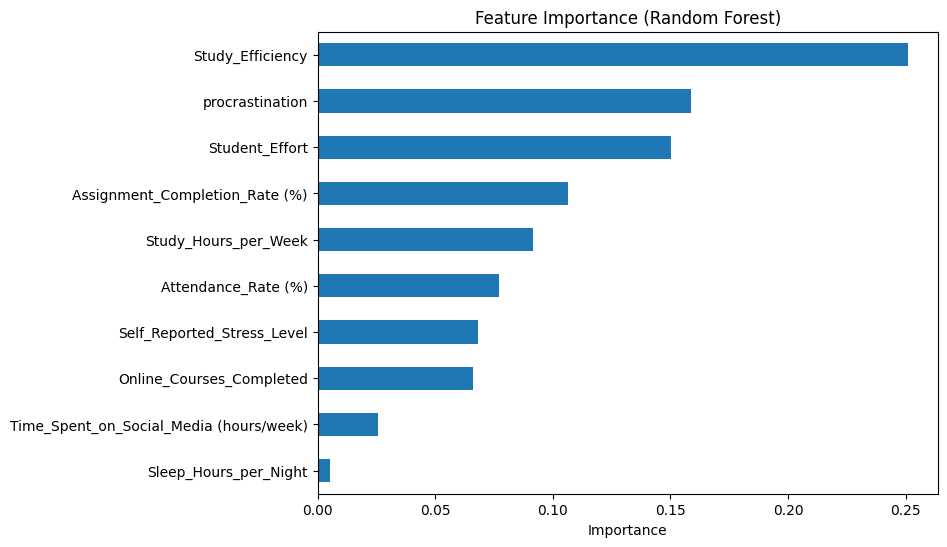

In [ ]:
importances = pd.Series(rf.feature_importances_, index=new_features)
importances.sort_values().plot(kind="barh", figsize=(8,6))
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.show()

# Naive Bayes

In [ ]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

y_pred_nb = nb.predict(X_test_scaled)

train_score = nb.score(X_train_scaled, y_train)
test_score = nb.score(X_test_scaled, y_test)

print("Naive Bayes Train Accuracy:", train_score)
print("Naive Bayes Test Accuracy:", test_score)
print(classification_report(y_test, y_pred_nb, target_names=["Fail", "Pass"]))

Naive Bayes Train Accuracy: 0.757
Naive Bayes Test Accuracy: 0.757
              precision    recall  f1-score   support

        Fail       0.00      0.00      0.00       485
        Pass       0.76      1.00      0.86      1515

    accuracy                           0.76      2000
   macro avg       0.38      0.50      0.43      2000
weighted avg       0.57      0.76      0.65      2000



# Summary of all models

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

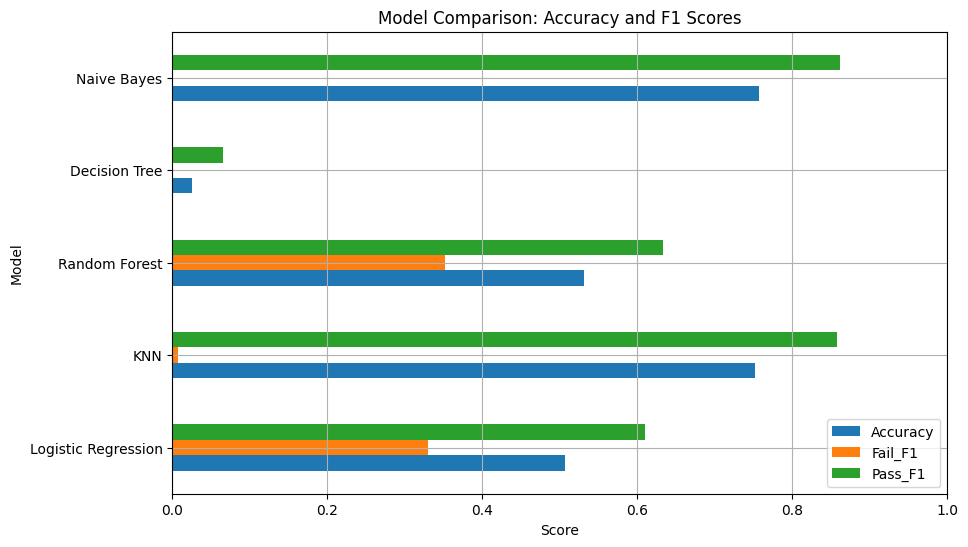

In [ ]:
report_logreg = classification_report(y_test, y_pred_logreg, output_dict=True)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_tree = classification_report(y_test, y_pred_tree, output_dict=True)
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)

def extract_metrics(report, label):
    return {"Accuracy": report["accuracy"],
        "Precision": report[label]["precision"],
        "Recall": report[label]["recall"],
        "F1-Score": report[label]["f1-score"]
    }

models = {
    "Logistic Regression": report_logreg,
    "KNN": report_knn,
    "Random Forest": report_rf,
    "Decision Tree": report_tree,
    "Naive Bayes": report_nb
}

rows = []
for model, report in models.items():
    metrics_fail = extract_metrics(report, "0")
    metrics_pass = extract_metrics(report, "1")

    row = {
        "Model": model,
        "Accuracy": metrics_fail["Accuracy"],
        "Fail_Precision": metrics_fail["Precision"],
        "Fail_Recall": metrics_fail["Recall"],
        "Fail_F1": metrics_fail["F1-Score"],
        "Pass_Precision": metrics_pass["Precision"],
        "Pass_Recall": metrics_pass["Recall"],
        "Pass_F1": metrics_pass["F1-Score"],
    }
    rows.append(row)

df_summary = pd.DataFrame(rows)


df_summary.set_index("Model")[["Accuracy", "Fail_F1", "Pass_F1"]].plot.barh(figsize=(10, 6))
plt.title("Model Comparison: Accuracy and F1 Scores")
plt.xlabel("Score")
plt.xlim(0, 1)
plt.grid(True)
plt.show()